# Image Metrics Example
Adapted from [SciKit-Image: Structural similarity index](http://scikit-image.org/docs/dev/auto_examples/plot_ssim.html).

**Note:**
*There seem to be some minor numerical instabilities on GPU.*

In [1]:
# Force matplotlib to use inline rendering
%matplotlib inline

import os
import sys

# add path to libraries for ipython
sys.path.append(os.path.expanduser("~/libs"))

import numpy as np
import tensorflow as tf
import tensortools as tt

from skimage import data, img_as_float
from scipy.misc import imresize

### Demo using SINGLE images

In [2]:
image = data.camera()
img = img_as_float(image)
rows, cols = img.shape

noise = np.ones_like(img) * 0.2 * (img.max() - img.min())
noise[np.random.random(size=noise.shape) > 0.5] *= -1

# a) Noise
img_noise = img + noise

# b) Constant noise
img_const = img + abs(noise)

# c) Scaled (center)
img_scaled = imresize(img, (rows, int(cols * 1.15)))
s = img_scaled.shape
border = (s[1] - s[0]) // 2
img_scaled = img_scaled[:, border:s[0]+border]
img_scaled = img_as_float(img_scaled)

# d) Scaled (left part)
img_scaled_left = imresize(img, (rows, int(cols * 1.1)))
img_scaled_left = img_scaled_left[:, 0:cols]
img_scaled_left = img_as_float(img_scaled_left)

In [3]:
image1 = tf.placeholder(tf.float32, shape=[rows, cols])
image2 = tf.placeholder(tf.float32, shape=[rows, cols])

def image_to_4d(image):
    image = tf.expand_dims(image, 0) # BATCH_SIZE = 1
    image = tf.expand_dims(image, -1) # CHANNELS = 1
    return image

image4d_1 = image_to_4d(image1)
image4d_2 = image_to_4d(image2)

ssim_index = tt.loss.ssim(image4d_1 * 255, image4d_2 * 255)
msssim_index = tt.loss.ms_ssim(image4d_1 * 255, image4d_2 * 255)
ssssim_index = tt.loss.ss_ssim(image4d_1 * 255, image4d_2 * 255)

mse = tt.loss.image_mse(image4d_1, image4d_2)
rmse = tt.loss.image_rmse(image4d_1, image4d_2)
mae = tt.loss.image_mae(image4d_1, image4d_2)
rmae = tt.loss.image_rmae(image4d_1, image4d_2)

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    
    mse_none = sess.run(mse,
                        feed_dict={image1: img, image2: img})
    mse_noise = sess.run(mse,
                         feed_dict={image1: img, image2: img_noise})
    mse_const = sess.run(mse,
                         feed_dict={image1: img, image2: img_const})
    mse_scaled = sess.run(mse,
                          feed_dict={image1: img, image2: img_scaled})
    mse_scaled_left = sess.run(mse,
                               feed_dict={image1: img, image2: img_scaled_left})
    
    rmse_none = sess.run(rmse,
                         feed_dict={image1: img, image2: img})
    rmse_noise = sess.run(rmse,
                          feed_dict={image1: img, image2: img_noise})
    rmse_const = sess.run(rmse,
                          feed_dict={image1: img, image2: img_const})
    rmse_scaled = sess.run(rmse,
                           feed_dict={image1: img, image2: img_scaled})
    rmse_scaled_left = sess.run(rmse,
                                feed_dict={image1: img, image2: img_scaled_left})
    
    mae_none = sess.run(mae,
                        feed_dict={image1: img, image2: img})
    mae_noise = sess.run(mae,
                         feed_dict={image1: img, image2: img_noise})
    mae_const = sess.run(mae,
                         feed_dict={image1: img, image2: img_const})
    mae_scaled = sess.run(mae,
                          feed_dict={image1: img, image2: img_scaled})
    mae_scaled_left = sess.run(mae,
                               feed_dict={image1: img, image2: img_scaled_left})
    
    rmae_none = sess.run(rmae,
                         feed_dict={image1: img, image2: img})
    rmae_noise = sess.run(rmae,
                          feed_dict={image1: img, image2: img_noise})
    rmae_const = sess.run(rmae,
                          feed_dict={image1: img, image2: img_const})
    rmae_scaled = sess.run(rmae,
                           feed_dict={image1: img, image2: img_scaled})
    rmae_scaled_left = sess.run(rmae,
                                feed_dict={image1: img, image2: img_scaled_left})

    ssim_none = sess.run(ssim_index,
                         feed_dict={image1: img, image2: img})
    ssim_noise = sess.run(ssim_index,
                          feed_dict={image1: img, image2: img_noise})
    ssim_const = sess.run(ssim_index,
                          feed_dict={image1: img, image2: img_const})
    ssim_scaled = sess.run(ssim_index,
                           feed_dict={image1: img, image2: img_scaled})
    ssim_scaled_left = sess.run(ssim_index,
                                feed_dict={image1: img, image2: img_scaled_left})

    msssim_none = sess.run(msssim_index,
                           feed_dict={image1: img, image2: img})
    msssim_noise = sess.run(msssim_index,
                            feed_dict={image1: img, image2: img_noise})
    msssim_const = sess.run(msssim_index,
                            feed_dict={image1: img, image2: img_const})
    msssim_scaled = sess.run(msssim_index,
                             feed_dict={image1: img, image2: img_scaled})
    msssim_scaled_left = sess.run(msssim_index,
                                  feed_dict={image1: img, image2: img_scaled_left})
    
    ssssim_none = sess.run(ssssim_index,
                           feed_dict={image1: img, image2: img})
    ssssim_noise = sess.run(ssssim_index,
                            feed_dict={image1: img, image2: img_noise})
    ssssim_const = sess.run(ssssim_index,
                            feed_dict={image1: img, image2: img_const})
    ssssim_scaled = sess.run(ssssim_index,
                             feed_dict={image1: img, image2: img_scaled})
    ssssim_scaled_left = sess.run(ssssim_index,
                                  feed_dict={image1: img, image2: img_scaled_left})

    
def print_result(title, mse, rmse, mae, rmae, ssim, msssim, ssssim):
    print('### {}:'.format(title))
    print('MSE: {}'.format(mse))
    print('RMSE: {}'.format(rmse))
    print('MAE: {}'.format(mae))
    print('RMAE: {}'.format(rmae))
    print('SSIM: {}'.format(ssim))
    print('SS-SSIM: {}'.format(ssssim))
    print('MS-SSIM: {}'.format(msssim))
    print
    
print_result('None',
             mse_none, rmse_none, mae_none, rmae_none, ssim_none, msssim_none, ssssim_none)
print_result('Noise',
             mse_noise, rmse_noise, mae_noise, rmae_noise, ssim_noise, msssim_noise, ssssim_noise)
print_result('Constant noise',
             mse_const, rmse_const, mae_const, rmae_const, ssim_const, msssim_const, ssssim_const)
print_result('Scaled (center)',
             mse_scaled, rmse_scaled, mae_scaled, rmae_scaled, ssim_scaled, msssim_scaled, ssssim_scaled)
print_result('Scaled (left)',
             mse_scaled_left, rmse_scaled_left, mae_scaled_left, rmae_scaled_left, ssim_scaled_left,
             msssim_scaled_left, ssssim_scaled_left)

### None:
MSE: 0.0
RMSE: 0.0
MAE: 0.0
RMAE: 0.0
SSIM: 1.0
SS-SSIM: 1.0
MS-SSIM: 1.0

### Noise:
MSE: 10485.7509766
RMSE: 102.39995575
MAE: 52428.8242188
RMAE: 228.973419189
SSIM: 0.105835258961
SS-SSIM: 0.307311892509
MS-SSIM: 0.534006118774

### Constant noise:
MSE: 10485.7509766
RMSE: 102.39995575
MAE: 52428.8242188
RMAE: 228.973419189
SSIM: 0.836651444435
SS-SSIM: 0.842247664928
MS-SSIM: 0.977653861046

### Scaled (center):
MSE: 7048.29638672
RMSE: 83.9541320801
MAE: 20671.4550781
RMAE: 143.77571106
SSIM: 0.628786146641
SS-SSIM: 0.592587590218
MS-SSIM: 0.613879799843

### Scaled (left):
MSE: 10021.7802734
RMSE: 100.108848572
MAE: 25892.2773438
RMAE: 160.910766602
SSIM: 0.574544787407
SS-SSIM: 0.520932495594
MS-SSIM: 0.453918486834



In [ ]:
tt.visualization.display_array(img*255)
tt.visualization.display_batch([img_noise, img_const, img_scaled, img_scaled_left])

## Test using BATCHES of images (MNIST)

File mnist.h5 has already been downloaded.
### Same image:
RMSE: 0.0
SSIM: 0.999999523163
SS-SSIM: 1.0
MS-SSIM: 0.999999761581
### Different images:
RMSE: 17.5549869537
SSIM: 0.563506305218
SS-SSIM: 0.285507798195
MS-SSIM: 0.402658224106


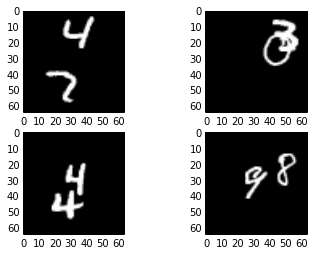

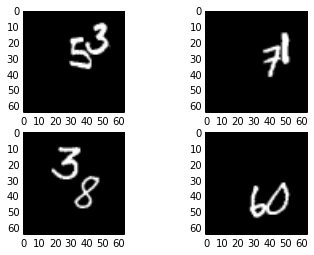

In [4]:
BATCH_SIZE = 4
FRAME_SIZE = 64
FRAME_CHANNELS = 1

dataset_train = tt.datasets.moving_mnist.MovingMNISTTrainDataset(BATCH_SIZE, 1)

image1 = tf.placeholder(tf.float32, shape=[None, FRAME_SIZE, FRAME_SIZE, FRAME_CHANNELS])
image2 = tf.placeholder(tf.float32, shape=[None, FRAME_SIZE, FRAME_SIZE, FRAME_CHANNELS])

ssim_loss = tt.loss.ssim(image1, image2)

# len(levels_weights) >= 3 can produce NaN here, because 64x64 image is too small
msssim_loss = tt.loss.ms_ssim(image1, image2, level_weights=[0.5, 0.5])

ssssim_loss = tt.loss.ss_ssim(image1, image2, level=2)

rmse_loss = tt.loss.image_rmse(image1, image2)

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    
    def get_batch_without_time_dim():
        dataset_train.reset()
        b = dataset_train.get_batch()
        return np.squeeze(b, (1,))
        
    batch = get_batch_without_time_dim()
    batch_rescaled = batch * 255 # because (MS-)SSIM expects scale [0-255]
    
    ssim = sess.run(ssim_loss,
                    feed_dict={image1: batch_rescaled, image2: batch_rescaled})
    msssim = sess.run(msssim_loss,
                       feed_dict={image1: batch_rescaled, image2: batch_rescaled})
    ssssim = sess.run(ssssim_loss,
                       feed_dict={image1: batch_rescaled, image2: batch_rescaled})
    rmse = sess.run(rmse_loss,
                    feed_dict={image1: batch, image2: batch})
    
    print "### Same image:"
    print('RMSE: {}'.format(rmse))
    print('SSIM: {}'.format(ssim))
    print('SS-SSIM: {}'.format(ssssim))
    print('MS-SSIM: {}'.format(msssim))
    
    batch_a = get_batch_without_time_dim()
    batch_b = get_batch_without_time_dim()
    batch_a_rescaled = batch_a * 255
    batch_b_rescaled = batch_b * 255
    
    tt.visualization.display_batch(batch_a)
    tt.visualization.display_batch(batch_b)
    
    ssim = sess.run(ssim_loss,
                    feed_dict={image1: batch_a_rescaled, image2: batch_b_rescaled})
    msssim = sess.run(msssim_loss,
                      feed_dict={image1: batch_a_rescaled, image2: batch_b_rescaled})
    ssssim = sess.run(ssssim_loss,
                      feed_dict={image1: batch_a_rescaled, image2: batch_b_rescaled})
    rmse = sess.run(rmse_loss,
                    feed_dict={image1: batch_a, image2: batch_b})
    
    print "### Different images:"
    print('RMSE: {}'.format(rmse))
    print('SSIM: {}'.format(ssim))
    print('SS-SSIM: {}'.format(ssssim))
    print('MS-SSIM: {}'.format(msssim))